# Let's see if it's working

In [1]:
import torch

import matplotlib.pyplot as plt

from nn.sequential import *
from nn.activation import *
from nn.linear import *
from nn.loss import *

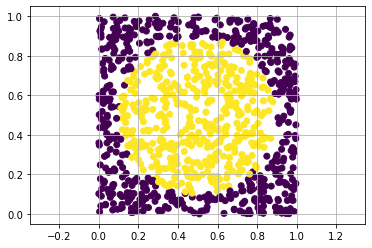

In [2]:
# Create test data
x = torch.rand((1000, 2))
pi = torch.acos(torch.zeros(1)).item() * 2
y = ((x - torch.Tensor([0.5, 0.5])).pow(2).sum(dim=1) <= 1/(2*pi)) * 1

# Plot test data
plt.scatter(x.numpy()[:,0], x.numpy()[:,1], c=y)
plt.axis('equal')
plt.grid()
plt.show()

In [3]:
y = y.float()

# Adam optimizer

In [4]:
# Define network
mod_ours = Linear(2, 1)
mod_theirs = torch.nn.Linear(2, 1)
mod_theirs.weight.data, mod_theirs.bias.data = mod_ours.param()

In [5]:
opt_ours = 'adam'
opt_theirs = torch.optim.Adam(mod_theirs.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-8)

In [6]:
loss_fn_ours = MSELoss()
loss_fn_theirs = torch.nn.MSELoss()

In [7]:
mod_theirs.zero_grad()

In [8]:
# Iterate over samples in x
for i in range(len(x))[:3]:
    # Get one data sample
    x_sample = x[i]
    y_sample = y[i].view(1)

    # Forward
    out_ours = mod_ours(x_sample)
    out_theirs = mod_theirs(x_sample)

    loss_ours = loss_fn_ours(out_ours, y_sample)
    loss_theirs = loss_fn_theirs(out_theirs, y_sample)
    
    dy = loss_fn_ours.backward()
    mod_ours.backward(dy)
    
    loss_theirs.backward()
    
    opt_theirs.step()
    mod_ours._update_params(optim=opt_ours, lr=0.01)
    
    print('our weights', mod_ours.cache['w'])
    print('theirs', mod_theirs.weight)
    print('out bias', mod_ours.cache['b'])
    print('theirs', mod_theirs.bias)

our weights tensor([[-0.8615,  0.2881]])
theirs Parameter containing:
tensor([[-0.8615,  0.2881]], requires_grad=True)
out bias tensor([nan])
theirs Parameter containing:
tensor([nan], requires_grad=True)
our weights tensor([[nan, nan]])
theirs Parameter containing:
tensor([[nan, nan]], requires_grad=True)
out bias tensor([nan])
theirs Parameter containing:
tensor([nan], requires_grad=True)
our weights tensor([[nan, nan]])
theirs Parameter containing:
tensor([[nan, nan]], requires_grad=True)
out bias tensor([nan])
theirs Parameter containing:
tensor([nan], requires_grad=True)


# SGD

In [9]:
# Define network
mod_ours = Linear(2, 1)
mod_theirs = torch.nn.Linear(2, 1)
mod_theirs.weight.data, mod_theirs.bias.data = mod_ours.param()

In [10]:
opt_ours = 'sgd'
opt_theirs = torch.optim.SGD(mod_theirs.parameters(), lr=0.01, momentum=0)

In [11]:
loss_fn_ours = MSELoss()
loss_fn_theirs = torch.nn.MSELoss()

In [12]:
mod_theirs.zero_grad()

In [13]:
# Iterate over samples in x
for i in range(len(x))[:3]:
    # Get one data sample
    x_sample = x[i]
    y_sample = y[i].view(1)

    # Forward
    out_ours = mod_ours(x_sample)
    out_theirs = mod_theirs(x_sample)

    loss_ours = loss_fn_ours(out_ours, y_sample)
    loss_theirs = loss_fn_theirs(out_theirs, y_sample)
    
    dy = loss_fn_ours.backward()
    mod_ours.backward(dy)
    
    loss_theirs.backward()
    
    opt_theirs.step()
    mod_ours._update_params(optim=opt_ours, lr=0.01)
    
    print('our weights', mod_ours.cache['w'])
    print('theirs', mod_theirs.weight)
    print('out bias', mod_ours.cache['b'])
    print('theirs', mod_theirs.bias)

our weights tensor([[ 0.0317, -1.0601]])
theirs Parameter containing:
tensor([[ 0.0317, -1.0601]], requires_grad=True)
out bias tensor([0.9399])
theirs Parameter containing:
tensor([0.9399], requires_grad=True)
our weights tensor([[ 0.0155, -1.0640]])
theirs Parameter containing:
tensor([[ 0.0155, -1.0640]], requires_grad=True)
out bias tensor([0.9272])
theirs Parameter containing:
tensor([0.9272], requires_grad=True)
our weights tensor([[ 0.0074, -1.0662]])
theirs Parameter containing:
tensor([[ 0.0074, -1.0662]], requires_grad=True)
out bias tensor([0.9231])
theirs Parameter containing:
tensor([0.9231], requires_grad=True)
